In [10]:
import os
import pandas as pd
import numpy as np
from collections import defaultdict

In [2]:
in_dir = "final"
dfs_list = []
features = []
labels = []

In [4]:

def trim_first_last_n_seconds(df, n, freq):
    remove_indexes = list(range(0, int(n*1000/freq)))
    df = df.drop(remove_indexes)
    remove_indexes = list(range(df.shape[0] - int(n*1000/freq), df.shape[0]-1))
    df = df.drop(remove_indexes)
    return df


In [92]:
for root, dirs, files in os.walk(in_dir):
    path = root.split(os.sep)

    for f in files:
        print("/".join(path) + "/" + f)

        full_path = "/".join(path) + "/" + f
        df = pd.read_csv(full_path, header=None)
        print(df.head())
        print("Before trimming: ", df.shape)
        df = trim_first_last_n_seconds(df, 10, 4)
        print("After trimming: ", df.shape)
   
        #Sample the data according to the size of the window with 50% overlap
        freq = 4
        window_size = 10
        for index in range(0, df.shape[0]-100, 5):
            indexes = list(range(index, index + int(window_size/freq)))
            labels.append(df[5].iloc[1])
            window = df.iloc[indexes,:]
            
            #Generate the features for this window
            mean_x = np.mean(window[1].tolist())
            mean_y = np.mean(window[2].tolist())
            mean_z = np.mean(window[3].tolist())
            
            var_x = np.var(window[1].tolist())
            var_y = np.var(window[2].tolist())
            var_z = np.var(window[3].tolist())
        
            #Store the features
            window_feature = []
            window_feature.append(mean_x)
            window_feature.append(mean_y)
            window_feature.append(mean_z)
            window_feature.append(var_x)
            window_feature.append(var_y)
            window_feature.append(var_z)  
            window_feature.append(df[5].iloc[1])
            features.append(window_feature)
        dfs_list.append(df)
        print(df.head())
dfs = pd.concat(dfs_list)      

final/0_1_android.sensor.accelerometer.data.csv
               0         1         2         3  4        5
0  1519420543519 -2.570769  0.186704  9.110194  2  sitting
1  1519420543523 -2.513322  0.186704  9.148493  2  sitting
2  1519420543527 -2.465449  0.205853  9.138918  2  sitting
3  1519420543531 -2.465449  0.215428  9.148493  2  sitting
4  1519420543535 -2.484598  0.205853  9.167642  2  sitting
Before trimming:  (64964, 6)
After trimming:  (59965, 6)
                  0         1         2         3  4        5
2500  1519420553366 -2.637791 -0.004787  9.138918  2  sitting
2501  1519420553369 -2.656940 -0.014362  9.138918  2  sitting
2502  1519420553373 -2.666515 -0.014362  9.158067  2  sitting
2503  1519420553377 -2.637791 -0.004787  9.148493  2  sitting
2504  1519420553381 -2.656940 -0.023936  9.148493  2  sitting
final/10_1_android.sensor.accelerometer.data.csv
               0         1         2         3  4            5
0  1519427100536  7.702734  5.998462 -0.052660  2  laying

               0         1         2         3  4            5
0  1519432749238  0.081384  8.717637 -4.715471  3  laying_down
1  1519432749241  0.100533  8.727212 -4.734620  3  laying_down
2  1519432749245  0.148406  8.784659 -4.763344  3  laying_down
3  1519432749248  0.129257  8.727212 -4.772918  3  laying_down
4  1519432749252  0.157980  8.717637 -4.792067  3  laying_down
Before trimming:  (101168, 6)
After trimming:  (96169, 6)
                  0         1         2         3  4            5
2500  1519432759099 -0.473941  0.885647  9.359133  3  laying_down
2501  1519432759102 -0.473941  0.876072  9.330409  3  laying_down
2502  1519432759106 -0.464366  0.837774  9.301685  3  laying_down
2503  1519432759110 -0.454792  0.847349  9.263388  3  laying_down
2504  1519432759114 -0.445217  0.837774  9.301685  3  laying_down
final/1_1_android.sensor.accelerometer.data.csv
               0         1         2          3  4         5
0  1519420932540 -2.838857 -2.159063  12.403843  2  standin

In [93]:
print(len(features))

454441


In [94]:
Xmap = defaultdict(list)
for e in features:
    Xmap[e[-1]].append(e[:-1])

In [95]:
print(len(Xmap['sitting']))

109896


In [96]:
mean={}
var = {}
for i in range(1,4):
    var[i]=np.mean(dfs[i])
    mean[i]=np.var(dfs[i])
min_={}
max_ = {}
for i in range(1,4):
    min_[i]=np.min(dfs[i])
    max_[i]=np.max(dfs[i])

In [102]:
def get_color(i,num):
    scale_ = 255 /(max_[i]-min_[i])
    return (num - min_[i])*scale_
def get_rgb(feature):
    col = []
    for i in range(1,4):
        col.append(int(get_color(4-i,feature[4-i])))
    return col
    

In [129]:
X_sitting_col = [get_rgb(x) for x in Xmap['laying_down']]

In [130]:
X_sitting_col[:5]

[[128, 38, 149],
 [127, 41, 134],
 [127, 41, 122],
 [128, 41, 138],
 [128, 41, 134]]

In [131]:
def spiral(lst,n):
    dx,dy = 1,0            # Starting increments
    x,y = 0,0              # Starting location
    myarray = [[None]* n for j in range(n)]
    for i in range(n**2):
        myarray[x][y] = lst[i]
        nx,ny = x+dx, y+dy
        if 0<=nx<n and 0<=ny<n and myarray[nx][ny] == None:
            x,y = nx,ny
        else:
            dx,dy = -dy,dx
            x,y = x+dx, y+dy
    return myarray

In [132]:
X_sitting_spiral = spiral(X_sitting_col,200)


In [133]:
print(X_sitting_col[:5])

[[128, 38, 149], [127, 41, 134], [127, 41, 122], [128, 41, 138], [128, 41, 134]]


In [134]:
npar = np.array(X_sitting_spiral)

In [135]:
print(len(X_sitting_col))

124945


In [136]:
npar.shape

(200, 200, 3)

In [137]:
from PIL import Image
import numpy as np

w, h = 512, 512
data = np.zeros((h, w, 3), dtype=np.uint8)
data[256, 256] = [255, 0, 0]
img = Image.fromarray(npar, 'RGB')
img.save('my.png')
#img.show()

In [138]:
print(mean,var,min_,max_)

{1: 33.48206113033793, 2: 11.10466898271074, 3: 21.79912471827089} {1: -2.5076527991960393, 2: -2.1792602660462737, 3: 4.536197084145258} {1: -19.603912000000001, 2: -19.594336999999999, 3: -19.603912000000001} {1: 19.594336999999999, 2: 156.8648, 3: 19.594336999999999}


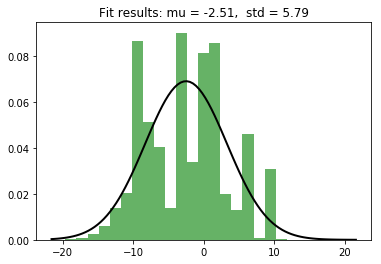

In [139]:
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.
data = dfs[1]

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, normed=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()